# NVIDIA Stock Analysis

This notebook analyzes NVIDIA's historical stock market data.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline


## Load Data


In [2]:
df_data = pd.read_csv('datasets/nvidia_stock/Nvidia_stock_data.csv')
df_history = pd.read_csv('datasets/nvidia_stock/NVidia_stock_history.csv')
df_info = pd.read_csv('datasets/nvidia_stock/NVidia_stock_info.csv')

print("Dataset shapes:")
print(f"Stock Data: {df_data.shape}")
print(f"Stock History: {df_history.shape}")
print(f"Stock Info: {df_info.shape}")

print("\n=== Stock Data ===")
display(df_data.head())
print("\n=== Stock History ===")
display(df_history.head())
print("\n=== Stock Info ===")
display(df_info.head())


Dataset shapes:
Stock Data: (6737, 6)
Stock History: (6442, 8)
Stock Info: (152, 2)

=== Stock Data ===


,Date,Close,High,Low,Open,Volume
0,1999-01-22,0.037607,0.044770,0.035577,0.040114,2714688000
1,1999-01-25,0.041547,0.042024,0.037607,0.040591,510480000
2,1999-01-26,0.038323,0.042860,0.037726,0.042024,343200000
3,1999-01-27,0.038204,0.039398,0.036293,0.038442,244368000
4,1999-01-28,0.038084,0.038442,0.037845,0.038204,227520000



=== Stock History ===


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1999-01-22 00:00:00-05:00,0.040129,0.044786,0.035590,0.037621,2714688000,0.0,0.0
1,1999-01-25 00:00:00-05:00,0.040607,0.042039,0.037621,0.041562,510480000,0.0,0.0
2,1999-01-26 00:00:00-05:00,0.042039,0.042876,0.037740,0.038337,343200000,0.0,0.0
3,1999-01-27 00:00:00-05:00,0.038457,0.039412,0.036307,0.038218,244368000,0.0,0.0
4,1999-01-28 00:00:00-05:00,0.038218,0.038457,0.037859,0.038098,227520000,0.0,0.0



=== Stock Info ===


,Key,Value
0,zip,95051
1,sector,Technology
2,fullTimeEmployees,18975
3,longBusinessSummary,NVIDIA Corporation operates as a visual comput...
4,city,Santa Clara


## Data Preprocessing


In [3]:
# Convert date columns
for df in [df_data, df_history]:
    for col in df.columns:
        if 'date' in col.lower():
            try:
                df[col] = pd.to_datetime(df[col])
                print(f"Converted {col} to datetime")
            except:
                pass

# Use history dataset for analysis (typically more complete)
df = df_history.copy()
date_col = next((col for col in df.columns if 'date' in col.lower()), None)
if date_col:
    df = df.sort_values(date_col)
    print(f"Date range: {df[date_col].min()} to {df[date_col].max()}")


Converted Date to datetime


Converted Date to datetime
Date range: 1999-01-22 00:00:00-05:00 to 2024-08-28 00:00:00-04:00


C:\Users\paulm\AppData\Local\Temp\ipykernel_30240\3986987649.py:6: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df[col] = pd.to_datetime(df[col])


## Stock Price Visualization


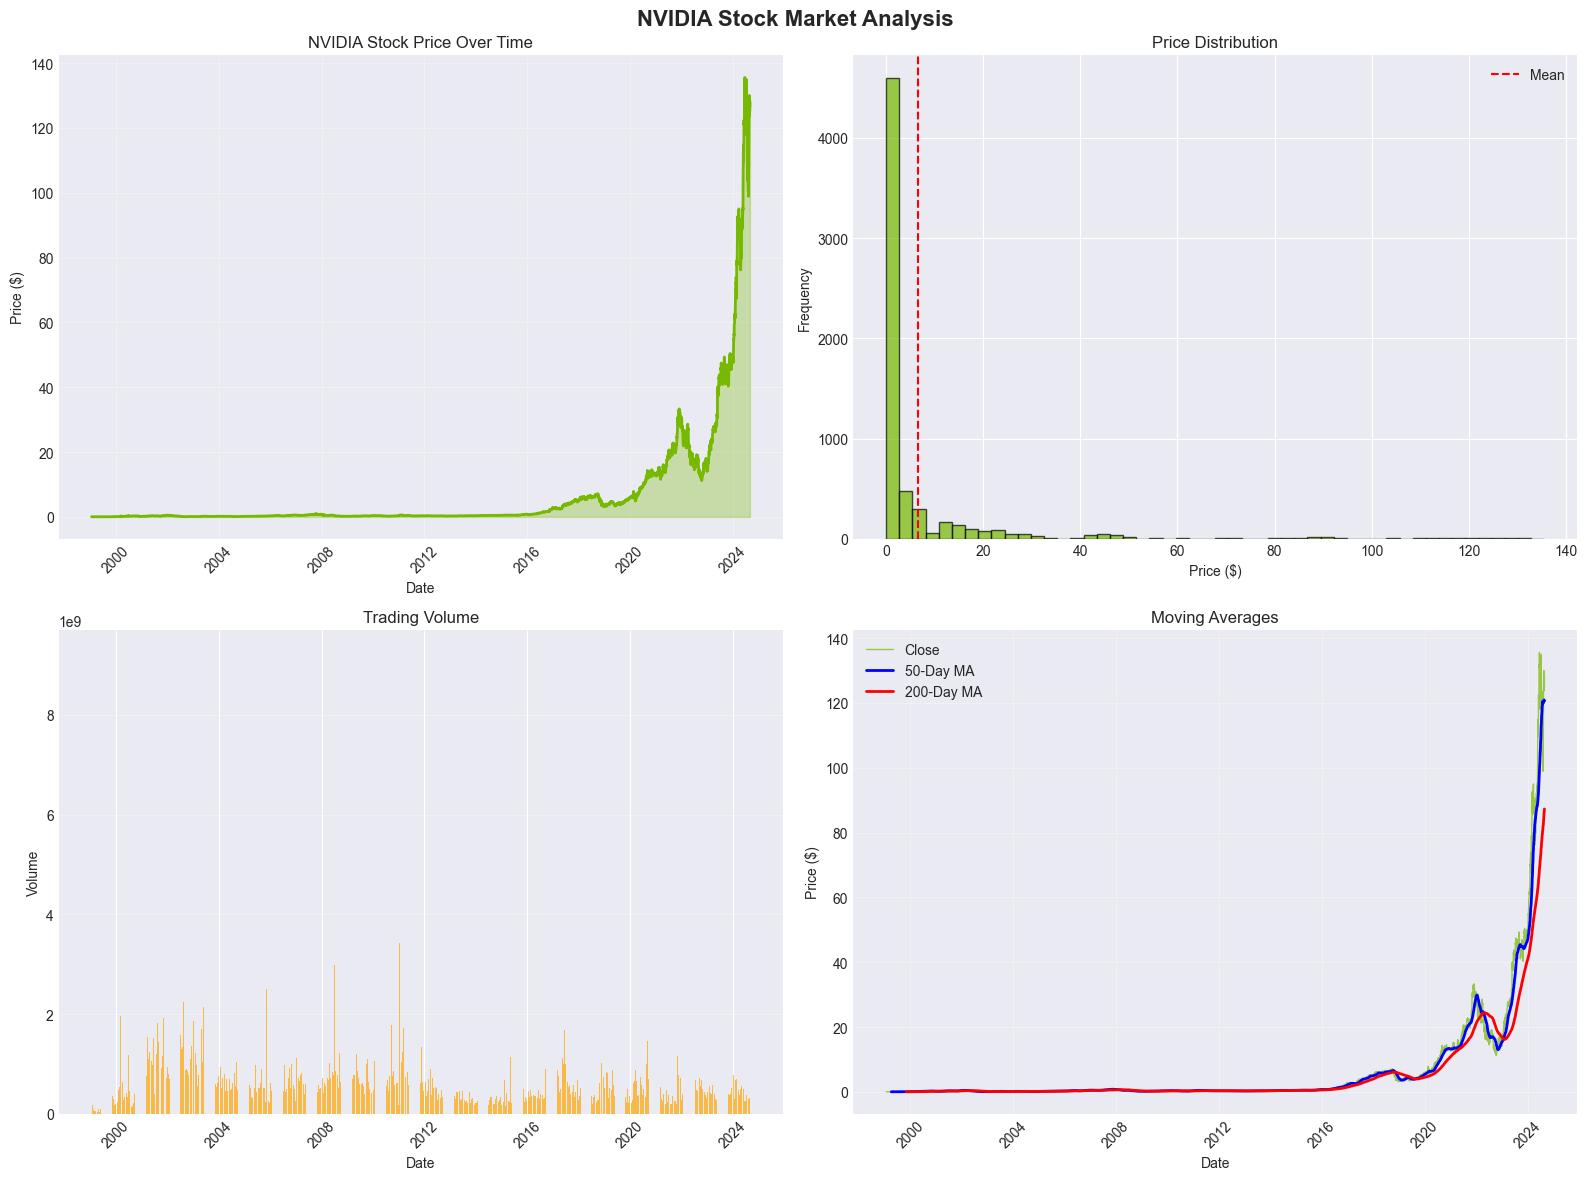

In [4]:
close_col = next((col for col in df.columns if 'close' in col.lower()), None)
volume_col = next((col for col in df.columns if 'volume' in col.lower()), None)
high_col = next((col for col in df.columns if 'high' in col.lower()), None)
low_col = next((col for col in df.columns if 'low' in col.lower()), None)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('NVIDIA Stock Market Analysis', fontsize=16, fontweight='bold')

if date_col and close_col:
    axes[0, 0].plot(df[date_col], df[close_col], linewidth=2, color='#76B900', label='Close Price')
    axes[0, 0].set_title('NVIDIA Stock Price Over Time')
    axes[0, 0].set_xlabel('Date')
    axes[0, 0].set_ylabel('Price ($)')
    axes[0, 0].tick_params(axis='x', rotation=45)
    axes[0, 0].grid(True, alpha=0.3)
    axes[0, 0].fill_between(df[date_col], df[close_col], alpha=0.3, color='#76B900')

if close_col:
    axes[0, 1].hist(df[close_col].dropna(), bins=50, edgecolor='black', alpha=0.7, color='#76B900')
    axes[0, 1].set_title('Price Distribution')
    axes[0, 1].set_xlabel('Price ($)')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].axvline(df[close_col].mean(), color='red', linestyle='--', label='Mean')
    axes[0, 1].legend()

if date_col and volume_col:
    axes[1, 0].bar(df[date_col], df[volume_col], color='orange', alpha=0.7)
    axes[1, 0].set_title('Trading Volume')
    axes[1, 0].set_xlabel('Date')
    axes[1, 0].set_ylabel('Volume')
    axes[1, 0].tick_params(axis='x', rotation=45)
    axes[1, 0].grid(True, alpha=0.3, axis='y')

if date_col and close_col:
    axes[1, 1].plot(df[date_col], df[close_col], linewidth=1, alpha=0.7, label='Close', color='#76B900')
    if len(df) >= 50:
        df['MA_50'] = df[close_col].rolling(window=50).mean()
        axes[1, 1].plot(df[date_col], df['MA_50'], linewidth=2, label='50-Day MA', color='blue')
    if len(df) >= 200:
        df['MA_200'] = df[close_col].rolling(window=200).mean()
        axes[1, 1].plot(df[date_col], df['MA_200'], linewidth=2, label='200-Day MA', color='red')
    axes[1, 1].set_title('Moving Averages')
    axes[1, 1].set_xlabel('Date')
    axes[1, 1].set_ylabel('Price ($)')
    axes[1, 1].tick_params(axis='x', rotation=45)
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


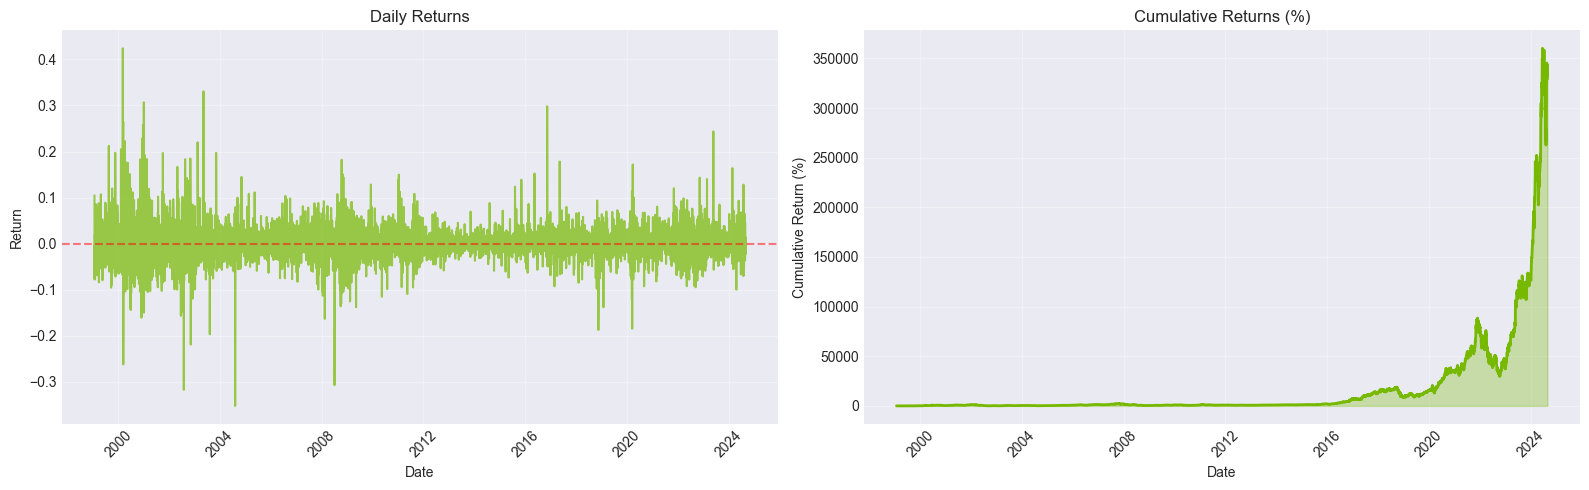

=== NVIDIA Stock Summary ===
Total Trading Days: 6442

Price Statistics:
  Current Price: $125.18
  Average Price: $6.54
  Minimum Price: $0.03
  Maximum Price: $135.58

Return Statistics:
  Average Daily Return: 0.0020 (0.20%)
  Total Return: 332626.59%
  Best Day: 42.41%
  Worst Day: -35.23%


In [5]:
if close_col:
    df['daily_return'] = df[close_col].pct_change()
    df['cumulative_return'] = (1 + df['daily_return']).cumprod() - 1
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))
    
    axes[0].plot(df[date_col], df['daily_return'], alpha=0.7, color='#76B900')
    axes[0].set_title('Daily Returns')
    axes[0].set_xlabel('Date')
    axes[0].set_ylabel('Return')
    axes[0].axhline(y=0, color='r', linestyle='--', alpha=0.5)
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].grid(True, alpha=0.3)
    
    axes[1].plot(df[date_col], df['cumulative_return'] * 100, linewidth=2, color='#76B900')
    axes[1].set_title('Cumulative Returns (%)')
    axes[1].set_xlabel('Date')
    axes[1].set_ylabel('Cumulative Return (%)')
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].grid(True, alpha=0.3)
    axes[1].fill_between(df[date_col], df['cumulative_return'] * 100, alpha=0.3, color='#76B900')
    
    plt.tight_layout()
    plt.show()
    
    print("=== NVIDIA Stock Summary ===")
    print(f"Total Trading Days: {len(df)}")
    print(f"\nPrice Statistics:")
    print(f"  Current Price: ${df[close_col].iloc[-1]:.2f}")
    print(f"  Average Price: ${df[close_col].mean():.2f}")
    print(f"  Minimum Price: ${df[close_col].min():.2f}")
    print(f"  Maximum Price: ${df[close_col].max():.2f}")
    
    print(f"\nReturn Statistics:")
    print(f"  Average Daily Return: {df['daily_return'].mean():.4f} ({df['daily_return'].mean()*100:.2f}%)")
    print(f"  Total Return: {df['cumulative_return'].iloc[-1]*100:.2f}%")
    print(f"  Best Day: {df['daily_return'].max()*100:.2f}%")
    print(f"  Worst Day: {df['daily_return'].min()*100:.2f}%")
